#1) Clasificación
## Ejemplo 2.2:
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Dataset "Pima Indians Diabetes Database":
Contiene información sobre mujeres de la tribu Pima India que viven cerca de Phoenix, Arizona, y ha sido ampliamente utilizado en la comunidad de aprendizaje automático como un conjunto de datos de referencia para la clasificación de la diabetes.

Este conjunto de datos consta de 768 muestras y 8 características. Aquí te presento un resumen de las columnas del dataset:

1. "Pregnancies": Número de veces que ha estado embarazada.
2. "Glucose": Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral.
3. "BloodPressure": Presión arterial diastólica (mm Hg).
4. "SkinThickness": Espesor del pliegue de la piel del tríceps (mm).
5. "Insulin": Insulina en suero de 2 horas (mu U/ml).
6. "BMI": Índice de masa corporal (peso en kg / (altura en m)^2).
7. "DiabetesPedigreeFunction": Función de pedigrí de diabetes, que proporciona una medida de la predisposición genética o la función hereditaria relacionada con la diabetes.
8. "Age": Edad en años.

El objetivo de clasificación en este dataset es predecir si una paciente tiene diabetes (etiqueta 1) o no (etiqueta 0) basándose en las características mencionadas anteriormente.



In [ ]:
# Cargando modulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score
from IPython.display import Image
import pydotplus
from io import StringIO
from sklearn.impute import SimpleImputer

In [ ]:
# Cargar el conjunto de datos Pima Indians Diabetes Database
url = 'https://raw.githubusercontent.com/Rafael-Ernesto-Perez/machine_learning/master/UNNE/2023/datasets/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

In [ ]:
# Mostrar información general del conjunto de datos
print("Información general del conjunto de datos:")
print(data.info())

Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


## ¿Cuantas columnas y filas tiene el dataset ?


## Visualizar las primeras 10 lineas del dataset en la siguiente casilla

In [ ]:
#tarea

In [ ]:
# Definir la variable objetivo y las características (variables predictoras)
y = data["Outcome"]
X = data.drop("Outcome", axis=1)

# Imputar los valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=27)

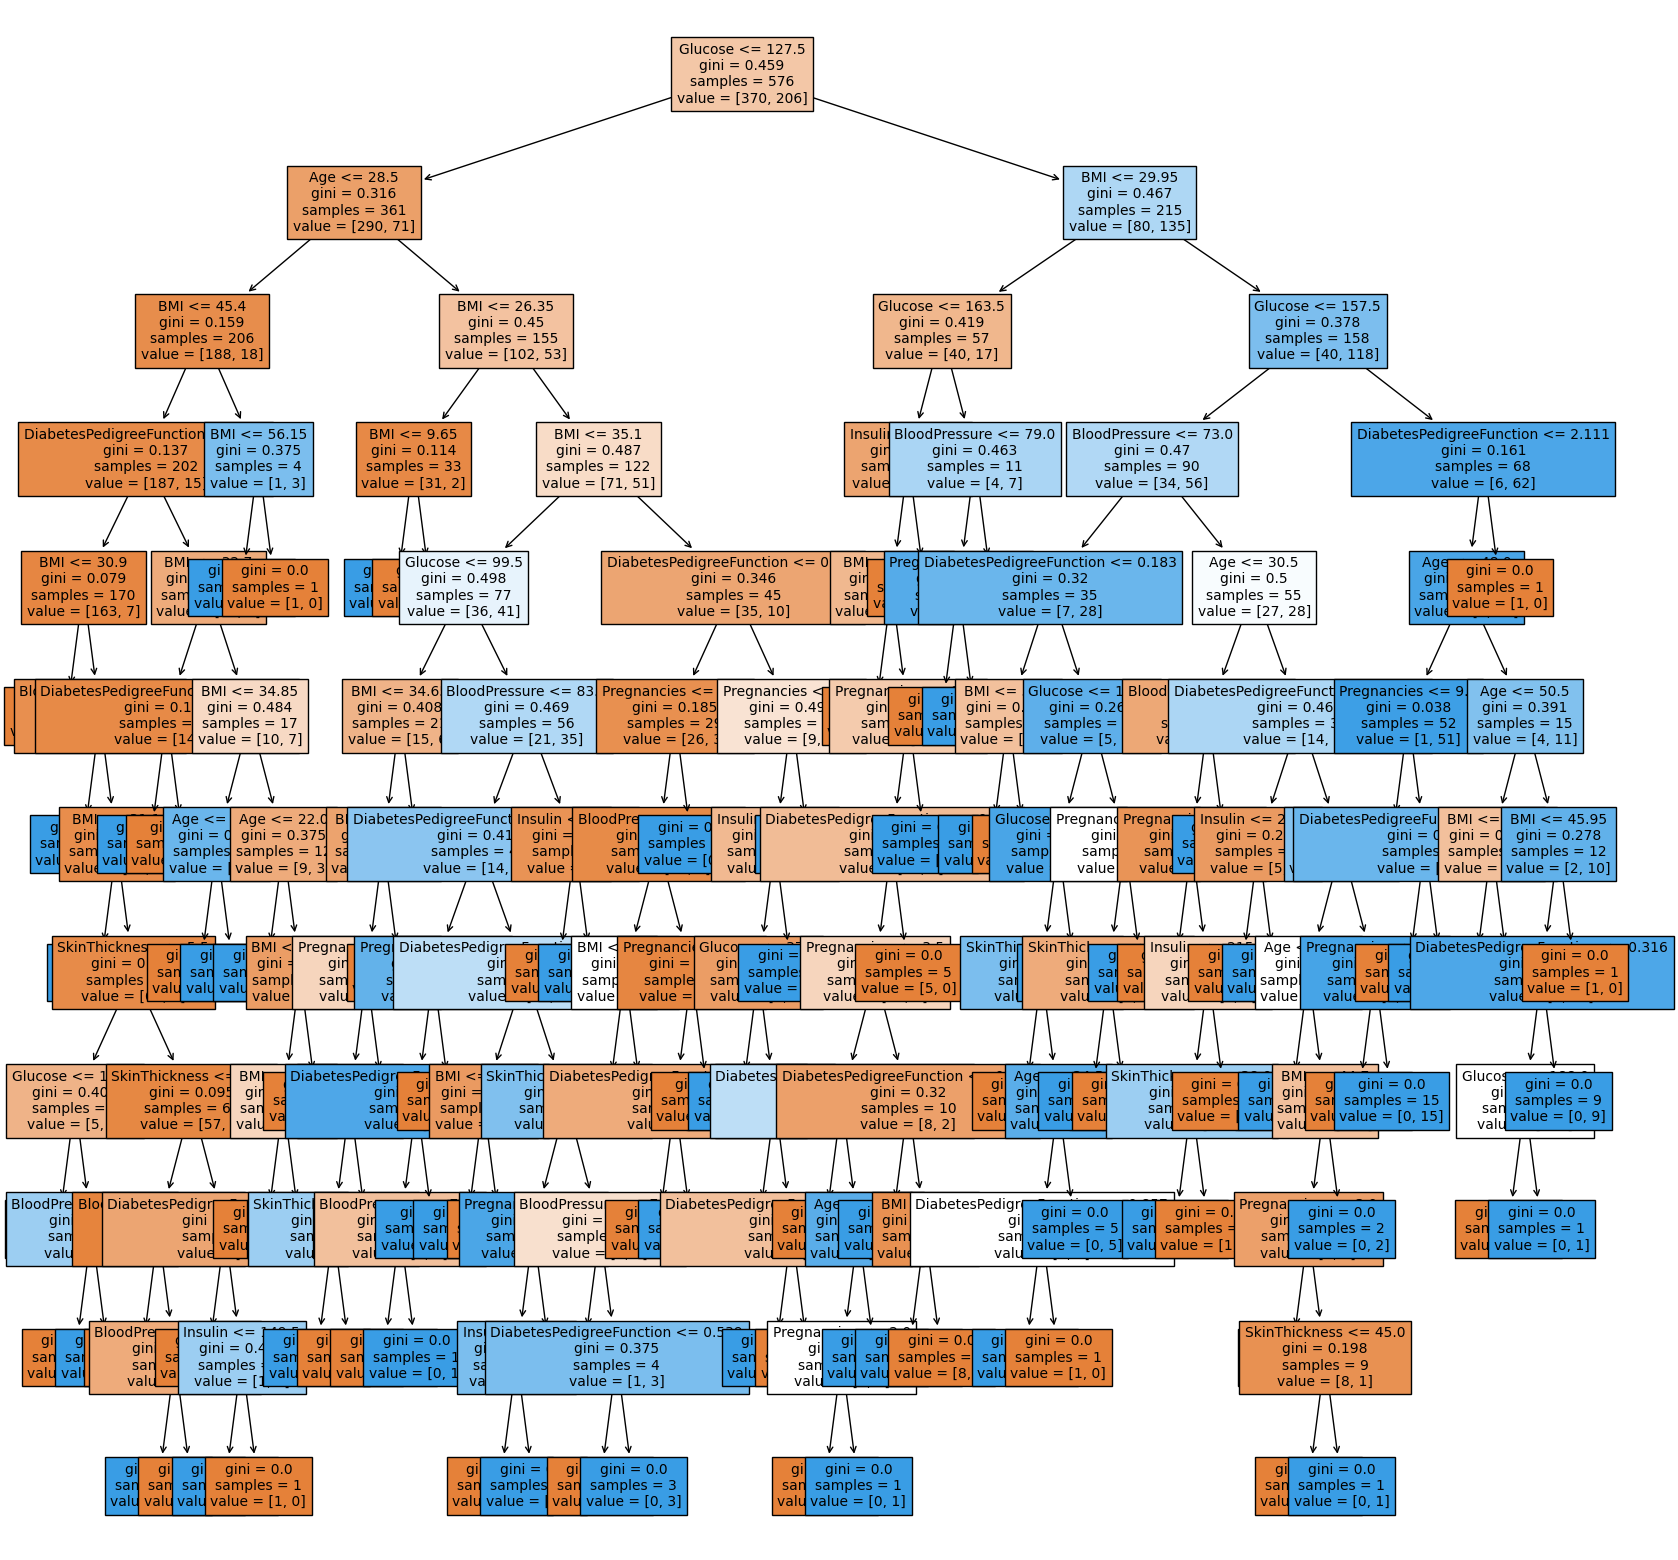

Aciertos: 0.703125


In [ ]:
# Crear el clasificador del árbol de decisión
arbol_c = DecisionTreeClassifier()
arbol_c.fit(X_train, y_train)

# Mostrar el árbol de clasificación
plt.figure(figsize=(20, 20))
plot_tree(arbol_c, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

# Realizar predicciones en el conjunto de prueba
predichos = arbol_c.predict(X_test)

# Calcular la tasa de aciertos
tasa_aciertos = accuracy_score(y_test, predichos)
print("Aciertos:", tasa_aciertos)



## Intentar mejorar los resultados mediante la modificación de la profundidad máxima (max_depth)

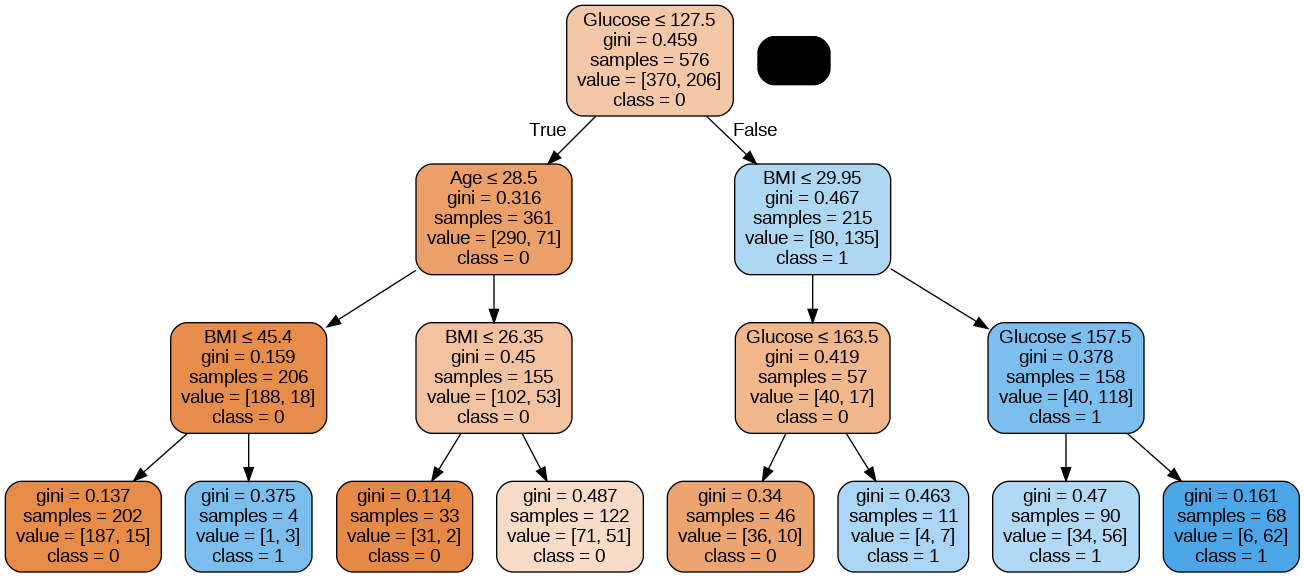

In [ ]:
# Crear un árbol de clasificación con una profundidad máxima de 3 para visualización
arbol_c2 = DecisionTreeClassifier(max_depth=3)
arbol_c2.fit(X_train, y_train)

# Visualizar el árbol de clasificación más legible
dot_data = StringIO()
export_graphviz(arbol_c2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



In [ ]:
# Calcular la tasa de aciertos del árbol podado en el conjunto de prueba
tasa_acierto2 = arbol_c2.score(X_test, y_test)
print("Tasa de acierto del árbol podado:", tasa_acierto2)
print("Tasa de acierto del árbol podado:", tasa_acierto2*100)

Tasa de acierto del árbol podado: 0.7604166666666666
Tasa de acierto del árbol podado: 76.04166666666666


## Modficando el valor de ccp_alpha

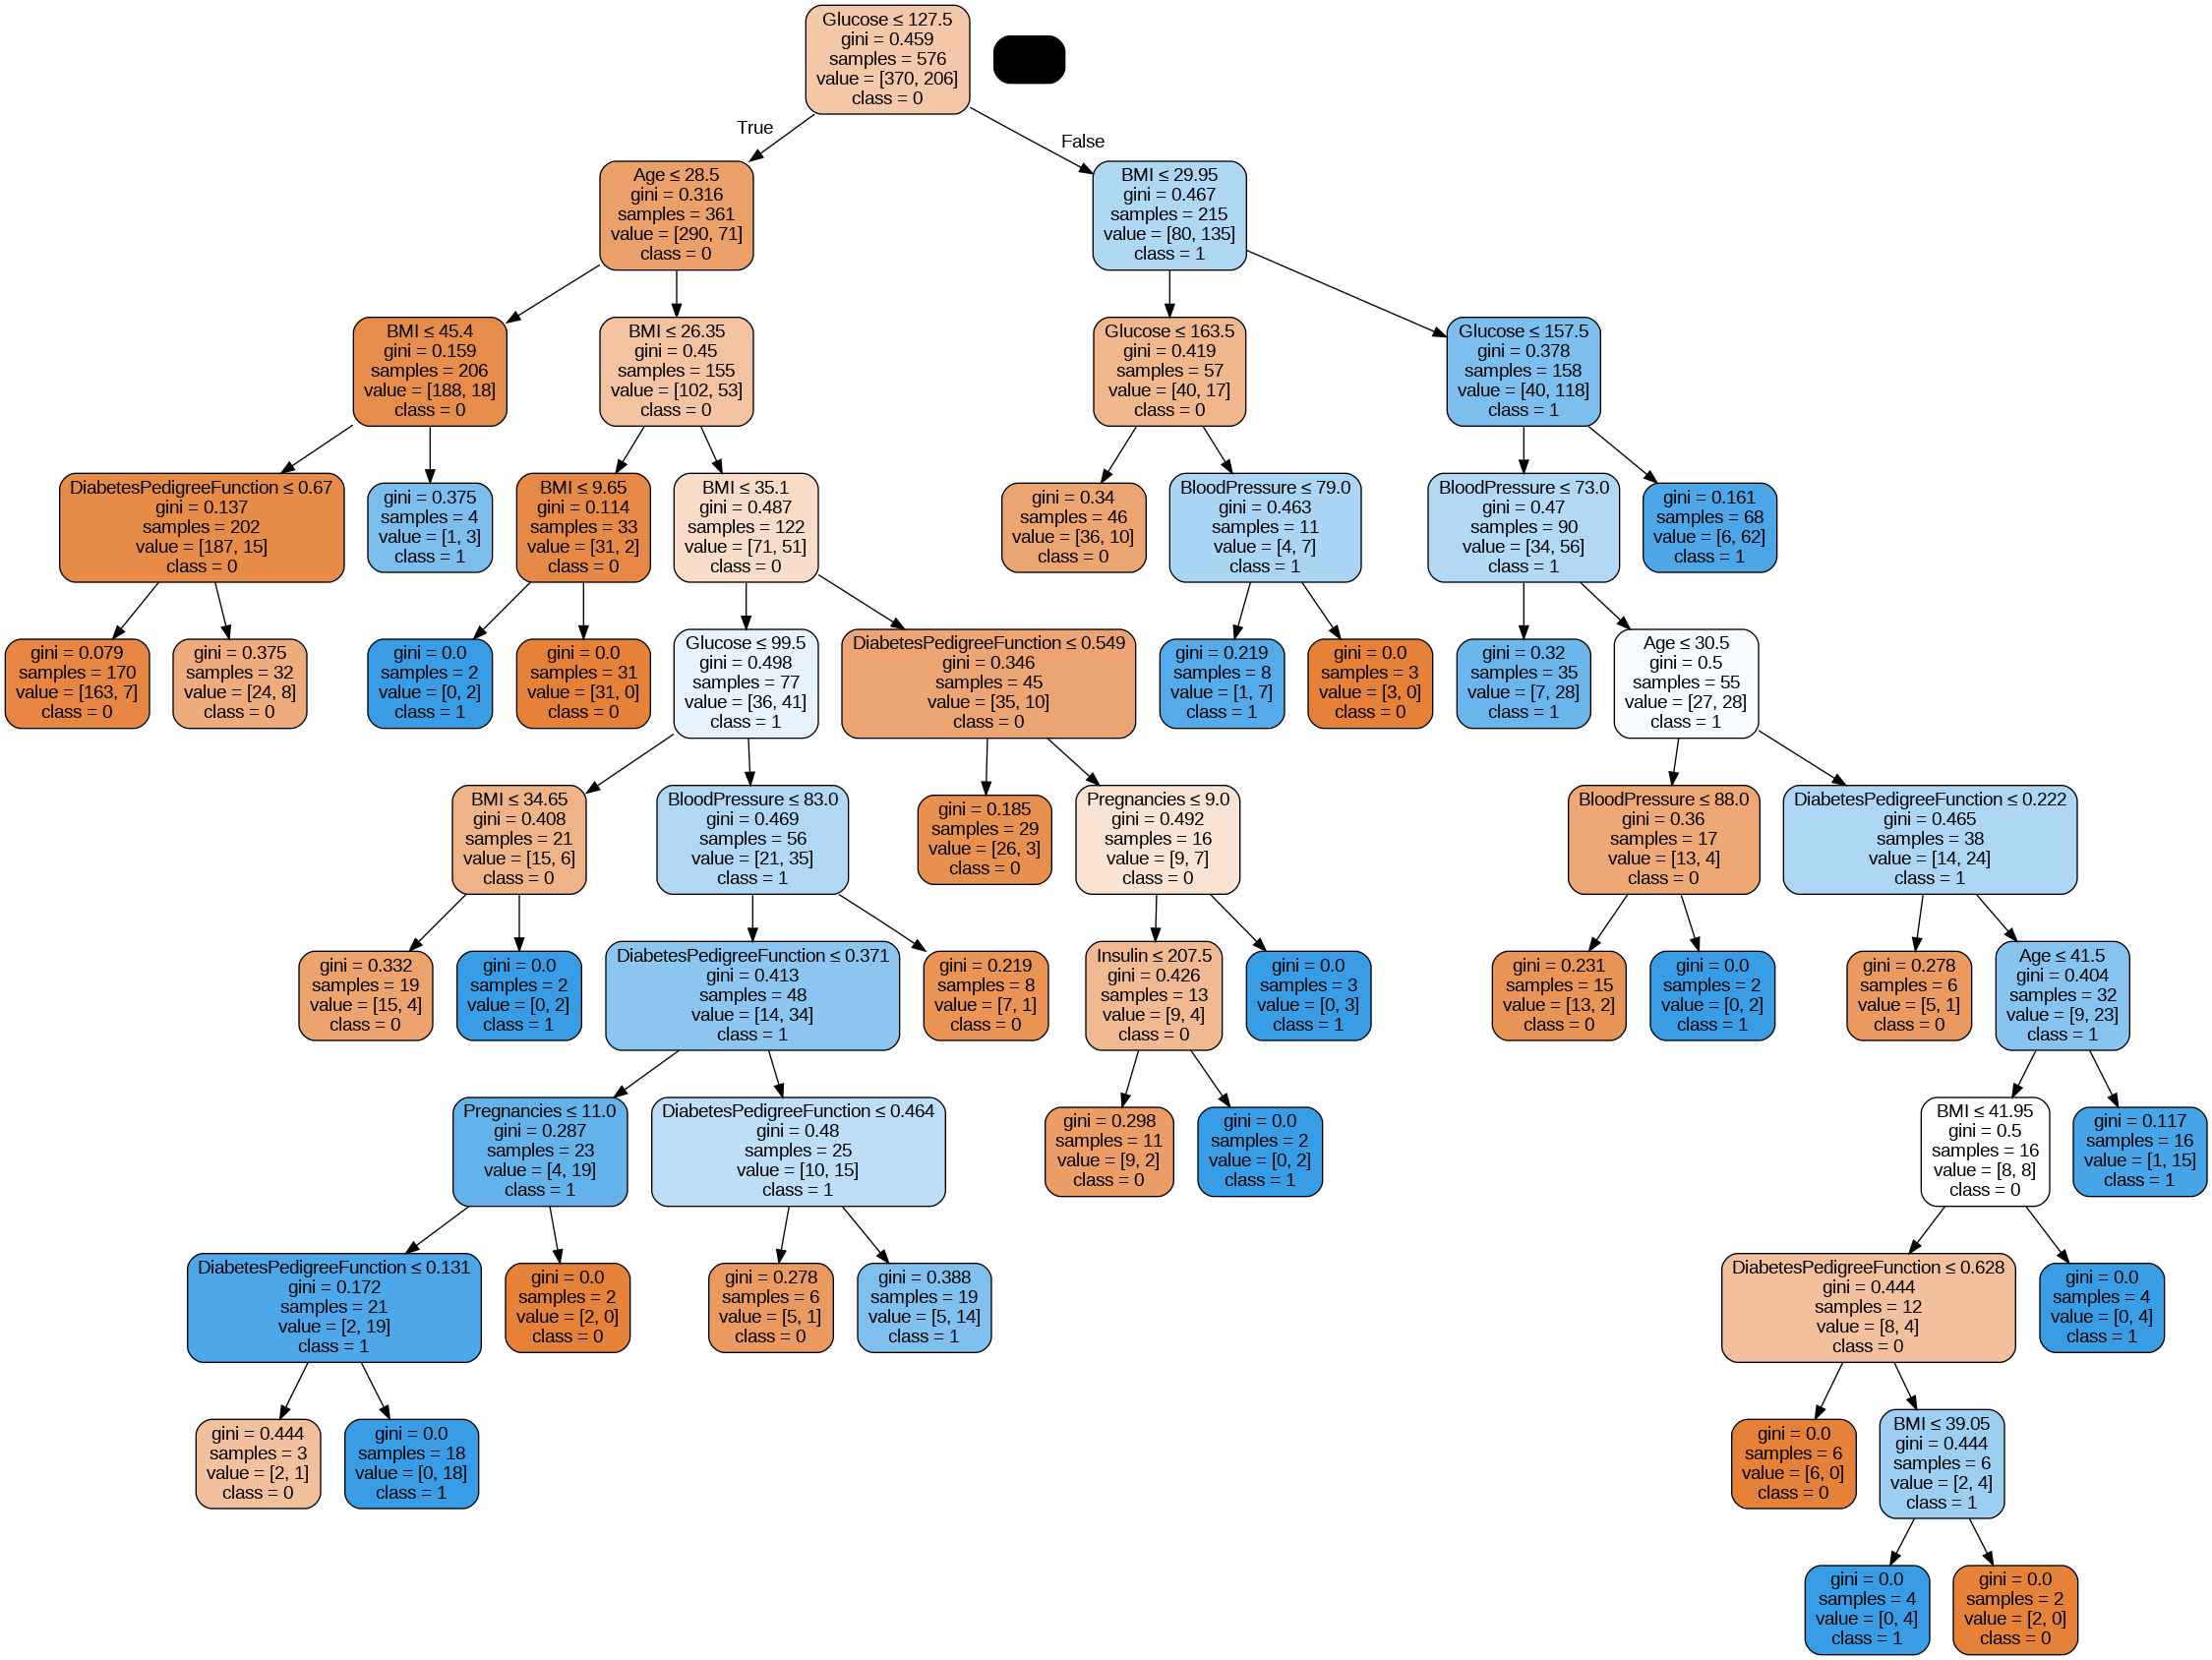

In [ ]:
# Realizar la poda del árbol utilizando el parámetro ccp_alpha
alfas = arbol_c.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = alfas.ccp_alphas

# Construir todos los árboles posibles con los diferentes valores de ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Calcular las tasas de aciertos y el número de nodos para cada árbol
test_scores = [clf.score(X_test, y_test) for clf in clfs]
node_counts = [clf.tree_.node_count for clf in clfs]

# Encontrar el valor ccp_alpha que maximiza la tasa de aciertos
optimal_alpha = ccp_alphas[np.argmax(test_scores)]

# Crear un árbol de clasificación con el valor óptimo de ccp_alpha
arbol_c3 = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
arbol_c3.fit(X_train, y_train)

# Visualizar el árbol de clasificación podado
dot_data = StringIO()
export_graphviz(arbol_c3, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())





In [ ]:
# Calcular la tasa de aciertos del árbol podado en el conjunto de prueba
tasa_acierto3 = arbol_c3.score(X_test, y_test)
print("Tasa de acierto del árbol podado:", tasa_acierto3)
print("Tasa de acierto del árbol podado %:", tasa_acierto3*100)

Tasa de acierto del árbol podado: 0.765625
Tasa de acierto del árbol podado %: 76.5625


## ¿Mejoran los resultados mediante la modificación de ccp alpha?
## ¿Cual es el ccp alpha óptimo?

# <font color='red'> Tarea 1 </font>
# Modifique el set de datos para trabajar con 70 % del total para entrenamiento.
# Aplique validacion cruzada


# Tarea 2

# Un AD, como  modelo de aprendizaje supervisados, presenta posibilidad de un sobreajuste. Por ello, se debe entrenar con diferentes configuraciones.
# Entre los parámetros establecidos para el modelo, están: la profundidad del árbol y el número mínimo de muestras necesarias para la división de cada nodo interno.
# Realizar al menos 2 configuraciones y construir una tabla resumen. Analizar la mejor configuración a partir de una métrica

#Tarea 3
#¿Si realizamos random forest con este dataset ? ¿Mejorará la performance ?
# Si mejora, ¿De cuanto es la mejora?
# ¿A que se debe la mejora o no de los resultados?

